# Region basics

An object on which finite difference mesh, and accordingly, finite difference field are based is `Region`. In this tutorial, we show how to define a region as well as some basic operations.

A region is can be defined in any number of spatial dimensions. It is always cuboidal and it can be defined by any two diagonally opposite corner points. For instance, let us assume we have a region in 3D Cartesian coordinates with edge lengths:

$$l_{x} = 100 \,\text{nm}$$
$$l_{y} = 50 \,\text{nm}$$
$$l_{z} = 20 \,\text{nm}$$

In order to define this region we need to choose two diagonally opposite corner points. There are many possibilities, but it is up to us which corner points we are going to choose as well as where we are going to position our region in Cartesian coordinate system. Most often, we choose either:

$$p_{1} = (0, 0, 0)$$
$$p_{2} = (l_{x}, l_{y}, l_{z})$$

or

$$p_{1} = \left(-\frac{l_{x}}{2}, -\frac{l_{y}}{2}, -\frac{l_{z}}{2}\right)$$
$$p_{2} = \left(\frac{l_{x}}{2}, \frac{l_{y}}{2}, \frac{l_{z}}{2}\right)$$

For simplicity, we are going to position $p_{1}$ at the origin of the coordinate system.

For the three-dimensional Cartesian coordinates, we define points as length-3 tuples and pass them to `Region` object via `p1` and `p2` arguments.

In [1]:
import discretisedfield as df  # df is here chosen to be an alias for discretisedfield

p1 = (0, 0, 0)
p2 = (100e-9, 50e-9, 20e-9)

region = df.Region(p1=p1, p2=p2)

(All units are SI and no prefixes are assumed. Therefore $1 \,\text{nm}$ is `1e-9`.)

The region is now defined. Now, we are going to have a look at some basic methods (functions) which are part of the `Region` object.

We can ask the region to give us the minimum and maximum points in the region.

In [2]:
region.pmin

array([0., 0., 0.])

In [3]:
region.pmax

array([1.e-07, 5.e-08, 2.e-08])

We can also ask the region for its dimensionality using attribute `ndim`.

In [4]:
region.ndim

3

In the above example $p_\text{min} = p_{1}$ and $p_\text{max} = p_{2}$, however, this is not the case every time. In general one could have chosen any two diagonally opposite points for $p_{1}$ and $p_{2}$ to define the region, for example, ${p}_{1} = (100\text{e}^{-9}, 0, 0)$ and ${p}_{1} = (0, 50\text{e}^{-9}, 20\text{e}^{-9})$ .

Now we can ask the region to give us the edge lengths of the region (based on $p_{1}$ and $p_{2}$ we used at the definition).

In [5]:
region.edges

array([1.e-07, 5.e-08, 2.e-08])

These lengths correspond to $l_{x}$, $l_{y}$, and $l_{z}$ we discussed earlier.

Similarly, we can ask for a centre point in the region (cross section point of all diagonals).

In [6]:
region.center

array([5.0e-08, 2.5e-08, 1.0e-08])

Obviously, centre point we got is:

$$p_\text{c} = (\frac{l_{x}}{2}, \frac{l_{y}}{2}, \frac{l_{z}}{2})$$

The volume of the region is:

In [7]:
region.volume

9.999999999999998e-23

This value is in $\text{m}^{3}$ and it is calculated as

$$V=l_{x}l_{y}l_{z}$$

Now, let us say we have a point $p$ and want to check if that point is in our region. We can do that using `in`. For instance, if our point is $p = (2\,\text{nm}, 4\,\text{nm}, 1\,\text{nm})$, we can ask the region if point $p$ is in it.

In [8]:
p = (2e-9, 4e-9, 1e-9)

p in region

True

As a result, we get `bool` (either `True` or `False`). This can be useful, when we want to use these expressions as conditions for some more complex functions. For example:

In [9]:
if p in region:
    print("Point: I'm in! :)")
else:
    print("Point: I'm out! :(")

Point: I'm in! :)


On the other hand, we could have chosen a point which is outside of our region:

In [10]:
(1e-9, 200e-9, 0) in region

False

Sometimes we want to check if two regions are the same. We can do that using relational `==` operator. Let us define two regions: one which is the same to the one we have and one different:

In [11]:
region_same = df.Region(p1=(0, 0, 0), p2=(100e-9, 50e-9, 20e-9))
region_different = df.Region(p1=(0, 0, 0), p2=(10e-9, 5e-9, 2e-9))

Now we can compare them:

In [12]:
region == region_same

True

In [13]:
region == region_different

False

Just like `in` operator, `==` returns `bool`. Similarly, we can ask if two regions are different:

In [14]:
region != region_same

False

In [15]:
region != region_different

True

Finally, we can ask the region object about its representation string:

In [16]:
repr(region)

"Region(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm'])"

In a Jupyter notebook we can also get an HTML representation.

In [17]:
region

Region(pmin=[0.0, 0.0, 0.0], pmax=[1e-07, 5e-08, 2e-08], dims=['x', 'y', 'z'], units=['m', 'm', 'm'])

From the representation we can see that a region has additional attributes `dims` and `units`. These have the default values shown above if we do not pass anything during initialisation.

In [18]:
region.dims

('x', 'y', 'z')

In [19]:
region.units

('m', 'm', 'm')

`dims` and `units` can be changed. This does not affect the actual data as units are only used as "labels".

In [20]:
region.units = ["nm", "nm", "nm"]
region.units

('nm', 'nm', 'nm')

They can be reset to the default by passing `None`.

In [21]:
region.units = None
region.units

('m', 'm', 'm')

We can create a new region with custom `dims` and `units`.

In [22]:
region = df.Region(
    p1=(0, 0, 0), p2=(20, 20, 10), units=["μm", "μm", "μm"], dims=["x0", "x1", "x2"]
)
region

Region(pmin=[0, 0, 0], pmax=[20, 20, 10], dims=['x0', 'x1', 'x2'], units=['μm', 'μm', 'μm'])

Regions can be plotted. There is a detailed notebook showing all the options. Here, we just use the defaults.

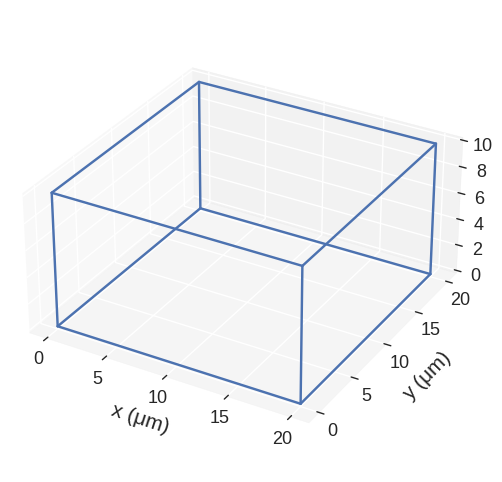

In [23]:
region.mpl()

A regions has two methods `scale` and `translate`. Both optionally allow `inplace` operations.

## Scale

In [24]:
scaled = region.scale(2)
scaled

Region(pmin=[-10.0, -10.0, -5.0], pmax=[30.0, 30.0, 15.0], dims=['x0', 'x1', 'x2'], units=['μm', 'μm', 'μm'])

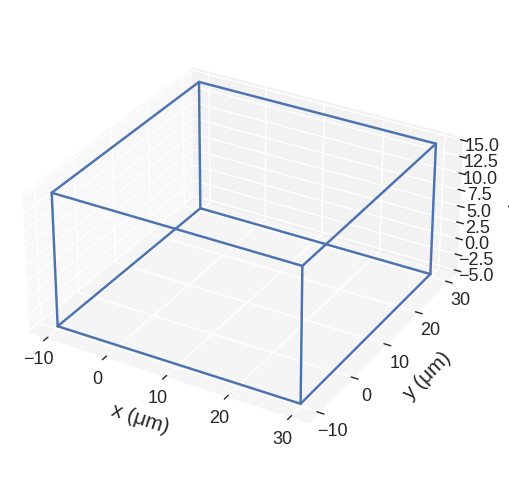

In [25]:
scaled.mpl()

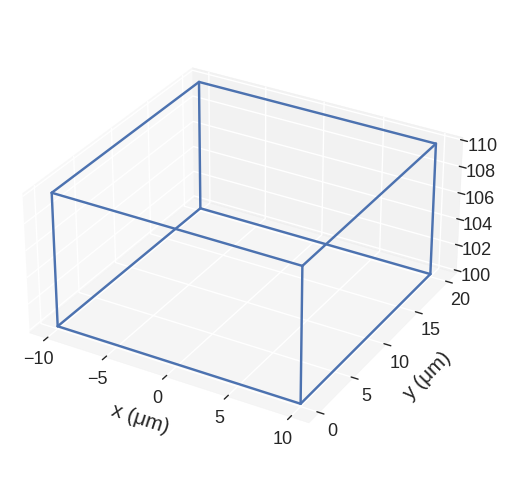

In [26]:
region.translate((-10, 0, 100)).mpl()

We can scale with different factors along different directions and pass in a `reference_point` that does not move when scaling. If not passed the `center` of the region is kept fixed.

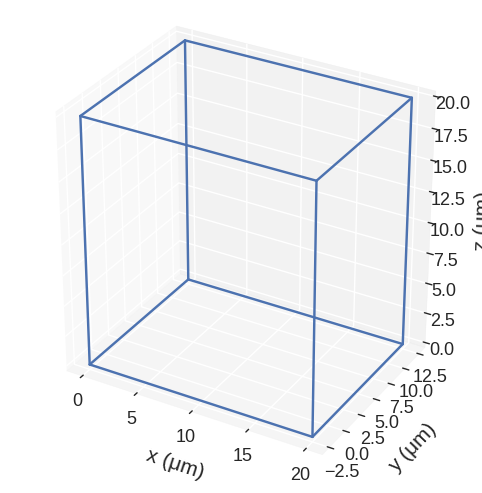

In [27]:
scaled = region.scale((1, 0.75, 2), reference_point=(-10, -10, 0))
scaled.mpl()

It is also possible to scale the region `inplace`.

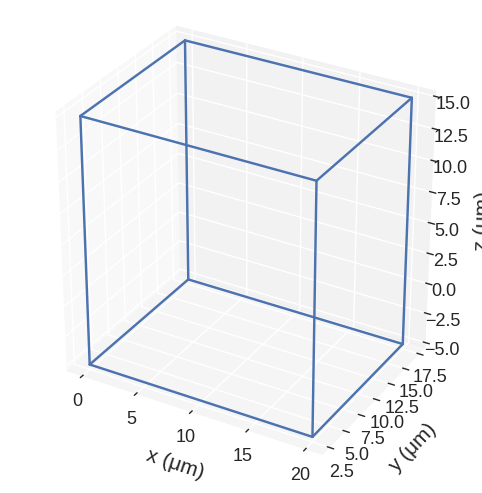

In [28]:
region.scale((1, 0.75, 2), inplace=True)
region.mpl()

## Other dimensions

Regions can have any dimension >= 1. Plotting is currently only supported for 3d regions.

A 1d region can be interpreted as a line.

In [29]:
region_1d = df.Region(p1=0, p2=10)
region_1d

Region(pmin=[0], pmax=[10], dims=['x'], units=['m'])

The dimensionality of a region can be obtained from the attribute `ndim`.

In [30]:
region_1d.ndim

1

A 2d region can be interpreted as a plane.

In [31]:
df.Region(p1=(0, 0), p2=(10, 20))

Region(pmin=[0, 0], pmax=[10, 20], dims=['x', 'y'], units=['m', 'm'])

For dimension larger than three the default for `dims` changes from `[x, y, z]` to `x0` to `xn-1`.

In [32]:
df.Region(p1=(1, 2, 3, 4), p2=(10, 20, 30, 40))

Region(pmin=[1, 2, 3, 4], pmax=[10, 20, 30, 40], dims=['x0', 'x1', 'x2', 'x3'], units=['m', 'm', 'm', 'm'])